In [1]:
from Helper_functions import *
import numpy as np 
from sklearn import preprocessing
gpdf_wijken = wfs_data("https://geodata.nationaalgeoregister.nl/wijkenbuurten2019/wfs", "wijkenbuurten2019:cbs_wijken_2019")
#gpdf_gemeenten = wfs_data("https://geodata.nationaalgeoregister.nl/wijkenbuurten2019/wfs", "wijkenbuurten2019:gemeenten2019")


In [2]:
print(gpdf_wijken.columns)
#print(gpdf_gemeenten.columns)

Index(['id', 'wijkcode', 'jrstatcode', 'wijknaam', 'gemeentecode',
       'gemeentenaam', 'ind_wbi', 'water', 'omgevingsadressendichtheid',
       'stedelijkheid_adressen_per_km2',
       'bevolkingsdichtheid_inwoners_per_km2', 'aantal_inwoners', 'mannen',
       'vrouwen', 'percentage_personen_0_tot_15_jaar',
       'percentage_personen_15_tot_25_jaar',
       'percentage_personen_25_tot_45_jaar',
       'percentage_personen_65_jaar_en_ouder',
       'percentage_personen_45_tot_65_jaar', 'percentage_ongehuwd',
       'percentage_gehuwd', 'percentage_gescheid', 'percentage_verweduwd',
       'aantal_huishoudens', 'percentage_eenpersoonshuishoudens',
       'percentage_huishoudens_zonder_kinderen',
       'percentage_huishoudens_met_kinderen', 'gemiddelde_huishoudsgrootte',
       'percentage_westerse_migratieachtergrond',
       'percentage_niet_westerse_migratieachtergrond',
       'percentage_uit_marokko',
       'percentage_uit_nederlandse_antillen_en_aruba',
       'percentage_uit_

# Data Understanding

 - `BU_CODE`          = Buurtcode
 - `JRSTATCODE`       = Jaar van de buurt gegegevens + buurtcode
 - `BU_NAAM`          = Buurtnaam van desbetreffende buurt
 - `WK_CODE`          = Wijkcode die is toegekend aan een wijk  
 - `WK_NAAM`          = Wijknaam die is toegekend aan een wijk
 - `GM_CODE`          = Gemeentecode die is toegekend aan een gemeente
 - `GM_NAAM`          = Gemeentenaam die is toegekend aan een gemeente
 - `IND_WBI`          = Indelingswijziging wijken en buurten; Deze indicator geeft per wijk en buurt aan of de cijfers uit deze tabel zonder problemen kunnen worden gekoppeld aan en vergeleken met de cijfers van een jaar eerder, of dat er wijzigingen in de Wijk- en Buurtindeling zijn waardoor dit niet kan. 
 - `WATER`            = Een onderverdeling tussen land en grotere wateroppervlakten overeenkomend met het Bestand Bodemgebruik van het CBS. 
 - `POSTCODE`         = Postcode van de wijk
 - `DEK_PERC`         = Dekkingspercentage van omgeving
 - `OAD`              = Omgevingsadressendichtheid; Het gemiddeld aantal adressen van een buurt, wijk of gemeente per vierkante kilometer binnen een cirkel met een straal van één kilometer op 1 januari van het betreffende jaar.
 - `STED`             = Stedelijkheid; Op grond van de omgevingsadressendichtheid is aan iedere buurt, wijk of gemeente een stedelijkheidsklasse toegekend.                       
 De volgende klassenindeling is gehanteerd:
                       -  1. zeer sterk stedelijk ≥ 2 500 adressen per km2;
                       -  2. sterk stedelijk 1 500–2 500 adressen per km2;
                       -  3. matig stedelijk 1 000–1 500 adressen per km2;
                       -  4. weinig stedelijk 500–1 000 adressen per km2;
                       -  5. niet stedelijk < 500 adressen per km2.
 - `BEV_DICHTH`       = Bevolkingsdichtheid in desbetreffende wijk
 - `AANT_INW`         = Aantal inwoners in desbetreffende wijk
 - `AANT_MAN`         = Aantal mannen in desbetreffende wijk
 - `AANT_VROUW`       = Aantal vrouwen in desbetreffende wijk
 - `P_00_14_JR`       = Percentage inwoners van 0 t/m 14 jaar
 - `P_15_24_JR`       = Percentage inwoners van 15 t/m 24 jaar
 - `P_25_44_JR`       = Percentage inwoners van 25 t/m 64 jaar
 - `P_45_64_JR`       = Percentage inwoners van 45 t/m 64 jaar
 - `P_65_EO_JR`       = Percentage inwoners van 65 jaar en ouder
 - `P_ONGEHUWD`       = Percentage inwoners die ongehuwd is
 - `P_GEHUWD`         = Percentage inwoners die gehuwd is
 - `P_GESCHEID`       = Percentage inwoners die gescheiden is
 - `P_VERWEDUW`       = Percentage inwoners die verweduwed is
 - `AANTAL_HH`        = Het aantal particuliere huishoudens op 1 januari.
 - `P_EENP_HH`        = Eenpersoonshuishoudens; Het aantal huishoudens met één persoon, uitgedrukt in hele procenten van het totaal aantal particuliere huishoudens.
 - `P_HH_Z_K`         = Huishoudens zonder kinderen; Het aantal meerpersoonshuishoudens zonder kinderen uitgedrukt in hele procenten van het totaal aantal particuliere huishoudens
 - `P_HH_M_K`         = Huishoudens met kinderen; Het aantal meerpersoonshuishoudens met kinderen uitgedrukt in hele procenten van het totaal aantal particuliere huishoudens.
 - `GEM_HH_GR`        = Gemiddelde huishoudensgrootte;
Het aantal in particuliere huishoudens levende personen gedeeld door het aantal particuliere huishoudens. 

 - `P_WEST_AL`        = Westers totaal; Het aantal allochtonen met een westerse herkomst op 1 januari, uitgedrukt in hele procenten van het aantal inwoners. 
 - `P_N_W_AL`         = Niet-westers totaal; Het aantal allochtonen met een niet-westerse herkomst op 1 januari, uitgedrukt in hele procenten van het aantal inwoners. 
 - `P_MAROKKO`        = Marokko totaal uitgedrukt in procenten
 - `P_ANT_ARU`        = Nederlandse Antillen en Aruba; Het aandeel allochtonen met herkomstgroep van (voormalige) Nederlandse Antillen en Aruba op 1 januari, uitgedrukt in hele procenten van het aantal inwoners.
 - `P_SURINAM`        = Surinamers uitgedrukt in procenten
 - `P_TURKIJE`        = Turken uitgedrukt in procenten
 - `P_OVER_NW`        = Overig niet-westers; Het aandeel allochtonen met een overige niet-westerse herkomst op 1 januari, uitgedrukt in hele procenten van het aantal inwoners.
 - `OPP_TOT`          = Totale oppervlakte in ha
 - `OPP_LAND`         = Oppervlakte land in ha
 - `OPP_WATER`        = Oppervlakte water in ha
 - `geometry`         = afmetingen op aarde van desbetreffende omgeving


 -99999999 staat voor nullwaardes


In [3]:
gpdf_wijken.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3247 entries, 0 to 3246
Data columns (total 39 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   id                                                  3247 non-null   object  
 1   wijkcode                                            3247 non-null   object  
 2   jrstatcode                                          3247 non-null   object  
 3   wijknaam                                            3247 non-null   object  
 4   gemeentecode                                        3247 non-null   object  
 5   gemeentenaam                                        3247 non-null   object  
 6   ind_wbi                                             3247 non-null   int64   
 7   water                                               3247 non-null   object  
 8   omgevingsadressendichtheid                          3247 non

In [4]:
gpdf_wijken = gpdf_wijken.replace(-99999999, np.nan)
#gpdf_gemeenten = gpdf_gemeenten.replace(-99999999, np.nan)


In [5]:
test = gpdf_wijken['stedelijkheid_adressen_per_km2']
test2 = gpdf_wijken['bevolkingsdichtheid_inwoners_per_km2']
test.describe()


count    3161.000000
mean        3.698197
std         1.461757
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: stedelijkheid_adressen_per_km2, dtype: float64

# Construct data

Hieronder wordt er aan de hand van boolean values een selectie gemaakt in de data. Deze boolean values zijn representatief met user input van de front end. Voor nu wordt er nog geen rekening gehouden met classificatie. Er wordt echter wel een selecte gemaakt met daarin dat bijvoorbeeld kolom 'omgevingsadressendichtheid' en 'stedelijkheid_adressen_per_km2' betrekking hebben tot stedelijkheid. Met deze data wordt er één extra kolom gemaakt met daarbin de normalisatie waarde. 
Deze normalisatie waarde wordt later dan weer gebruikt om een weging te kunnen maken voor de user input. 
Hieronder een overzicht met welke kolommen worden meegenomen bij de user input en dus de normalisatie:

- `Stedelijkheid` worden de kolommen omgevingsadressendichtheid, stedelijkheid_adressen_per_km2 meegenomen
- `water` wordt de kolom oppervlakte_water_in_ha meegenomen
- `mensen` worden de kolommen aantal_inwoners, bevolkingsdichtheid_inwoners_per_km2 meegenomen 
- `kinderen` worden de kolommen aantal_inwoners, percentage_personen_0_tot_15_jaar meegenomen
- `senioren` worden de kolommen aantal_inwoners, percentage_personen_65_jaar_en_ouder meegenomen 




In [6]:
gpdf_wijken_backup = gpdf_wijken

stedelijkheid = True
water = True
mensen = True 
kinderen = True 
senioren = True

if stedelijkheid == True:
    # Normalisatie waarde aanmaken voor 'omgevingsadressendichtheid'
    x = gpdf_wijken[['omgevingsadressendichtheid']]
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    gpdf_wijken['omgevingsadressendichtheid_genormaliseerd'] = pd.DataFrame(x_scaled)

    # Normalisatie waarde aanmaken voor stedelijkheid_adressen_per_km2
    x = gpdf_wijken[['stedelijkheid_adressen_per_km2']]
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    gpdf_wijken['stedelijkheid_adressen_per_km2_genormaliseerd'] = pd.DataFrame(x_scaled)

    # Maken van vertaling naar één normalisatie waarde in een kolom 'stedelijkheid_normalisatie_waarde'
    gpdf_wijken['stedelijkheid_normalisatie_waarde'] = gpdf_wijken['omgevingsadressendichtheid_genormaliseerd'] + gpdf_wijken['stedelijkheid_adressen_per_km2_genormaliseerd']

    # Verwijderen van overbodige kolommen
    gpdf_wijken.drop(columns=['omgevingsadressendichtheid_genormaliseerd','stedelijkheid_adressen_per_km2_genormaliseerd'], axis=1, inplace=True)

    #KLASSE KOLOM MAKEN OP BASIS VAN KWARTIELEN VAN NORMALISATIE WAARDE
    dataframe_kolom = gpdf_wijken["stedelijkheid_normalisatie_waarde"]
    q25 = dataframe_kolom.quantile(q=.25)
    q50 = dataframe_kolom.quantile(q=.5)
    q75 = dataframe_kolom.quantile(q=.75)

    # Gebruik de aantallen die bij vg_data.describe() staan
    m1 = dataframe_kolom < q25
    m2 = np.logical_and(dataframe_kolom >  q25, dataframe_kolom < q50)
    m3 = np.logical_and(dataframe_kolom >  q50, dataframe_kolom < q75)
    m4 = dataframe_kolom > q75

    gpdf_wijken['klasse_stedelijkheid_normalisatie'] = np.select([m1,m2,m3,m4], ['Laag','Middel','Middel-Hoog','Hoog'], default='Geen')

# -----------------------------------------------------------------------------------------------------

if mensen == True:
    # Normalisatie waarde aanmaken voor 'omgevingsadressendichtheid'
    x = gpdf_wijken[['aantal_inwoners']]
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    gpdf_wijken['aantal_inwoners_genormaliseerd'] = pd.DataFrame(x_scaled)
    
    # Normalisatie waarde aanmaken voor stedelijkheid_adressen_per_km2
    x = gpdf_wijken[['bevolkingsdichtheid_inwoners_per_km2']]
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    gpdf_wijken['bevolkingsdichtheid_inwoners_per_km2_genormaliseerd'] = pd.DataFrame(x_scaled)

    # Maken van vertaling naar één normalisatie waarde in een kolom 'stedelijkheid_normalisatie_waarde'
    gpdf_wijken['mensen_normalisatie_waarde'] = gpdf_wijken['aantal_inwoners_genormaliseerd'] + gpdf_wijken['bevolkingsdichtheid_inwoners_per_km2_genormaliseerd']

    # Verwijderen van overbodige kolommen
    gpdf_wijken.drop(columns=['aantal_inwoners_genormaliseerd','bevolkingsdichtheid_inwoners_per_km2_genormaliseerd'], axis=1, inplace=True)

    #KLASSE KOLOM MAKEN OP BASIS VAN KWARTIELEN VAN NORMALISATIE WAARDE
    dataframe_kolom = gpdf_wijken["mensen_normalisatie_waarde"]
    q25 = dataframe_kolom.quantile(q=.25)
    q50 = dataframe_kolom.quantile(q=.5)
    q75 = dataframe_kolom.quantile(q=.75)

    # Gebruik de aantallen die bij vg_data.describe() staan
    m1 = dataframe_kolom < q25
    m2 = np.logical_and(dataframe_kolom > q25, dataframe_kolom < q50)
    m3 = np.logical_and(dataframe_kolom > q50, dataframe_kolom < q75)
    m4 = dataframe_kolom > q75

    gpdf_wijken['klasse_mensen_normalisatie'] = np.select([m1,m2,m3,m4], ['Laag','Middel','Middel-Hoog','Hoog'], default='Geen')

# -----------------------------------------------------------------------------------------------------

if kinderen == True:
    # Normalisatie waarde aanmaken voor 'omgevingsadressendichtheid'
    gpdf_wijken['kinderen_berekening'] = gpdf_wijken['percentage_personen_0_tot_15_jaar'] / 100
    gpdf_wijken['aantal_kinderen_in_wijk'] = gpdf_wijken['aantal_inwoners'] * gpdf_wijken['kinderen_berekening']
    gpdf_wijken['aantal_kinderen_in_wijk'] = gpdf_wijken['aantal_kinderen_in_wijk'].apply(np.floor)

    x = gpdf_wijken[['aantal_kinderen_in_wijk']]
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    gpdf_wijken['kinderen_normalisatie_waarde'] = pd.DataFrame(x_scaled)

    gpdf_wijken.drop(columns=['kinderen_berekening', 'aantal_kinderen_in_wijk'], axis=1, inplace=True)

    #KLASSE KOLOM MAKEN OP BASIS VAN KWARTIELEN VAN NORMALISATIE WAARDE
    dataframe_kolom = gpdf_wijken["kinderen_normalisatie_waarde"]
    q25 = dataframe_kolom.quantile(q=.25)
    q50 = dataframe_kolom.quantile(q=.5)
    q75 = dataframe_kolom.quantile(q=.75)

    # Gebruik de aantallen die bij vg_data.describe() staan
    m1 = dataframe_kolom < q25
    m2 = np.logical_and(dataframe_kolom >  q25, dataframe_kolom < q50)
    m3 = np.logical_and(dataframe_kolom >  q50, dataframe_kolom < q75)
    m4 = dataframe_kolom > q75

    gpdf_wijken['klasse_kinderen_normalisatie'] = np.select([m1,m2,m3,m4], ['Laag','Middel','Middel-Hoog','Hoog'], default='Geen')

# -----------------------------------------------------------------------------------------------------

if senioren == True:
    # Normalisatie waarde aanmaken voor 'omgevingsadressendichtheid'
    gpdf_wijken['senioren_berekening'] = gpdf_wijken['percentage_personen_65_jaar_en_ouder'] / 100
    gpdf_wijken['aantal_senioren_in_wijk'] = gpdf_wijken['aantal_inwoners'] * gpdf_wijken['senioren_berekening']
    gpdf_wijken['aantal_senioren_in_wijk'] = gpdf_wijken['aantal_senioren_in_wijk'].apply(np.floor)

    x = gpdf_wijken[['aantal_senioren_in_wijk']]
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    gpdf_wijken['senioren_normalisatie_waarde'] = pd.DataFrame(x_scaled)

    gpdf_wijken.drop(columns=['senioren_berekening', 'aantal_senioren_in_wijk'], axis=1, inplace=True)

    #KLASSE KOLOM MAKEN OP BASIS VAN KWARTIELEN VAN NORMALISATIE WAARDE
    dataframe_kolom = gpdf_wijken["senioren_normalisatie_waarde"]
    q25 = dataframe_kolom.quantile(q=.25)
    q50 = dataframe_kolom.quantile(q=.5)
    q75 = dataframe_kolom.quantile(q=.75)

    # Gebruik de aantallen die bij vg_data.describe() staan
    m1 = dataframe_kolom < q25
    m2 = np.logical_and(dataframe_kolom >  q25, dataframe_kolom < q50)
    m3 = np.logical_and(dataframe_kolom >  q50, dataframe_kolom < q75)
    m4 = dataframe_kolom > q75

    gpdf_wijken['klasse_senioren_normalisatie'] = np.select([m1,m2,m3,m4], ['Laag','Middel','Middel-Hoog','Hoog'], default='Geen')

# -----------------------------------------------------------------------------------------------------

if water == True:
    # Normalisatie waarde aanmaken voor 'omgevingsadressendichtheid'
    x = gpdf_wijken[['oppervlakte_water_in_ha']]
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    gpdf_wijken['water_normalisatie_waarde'] = pd.DataFrame(x_scaled)

    #KLASSE KOLOM MAKEN OP BASIS VAN KWARTIELEN VAN NORMALISATIE WAARDE
    dataframe_kolom = gpdf_wijken["water_normalisatie_waarde"]
    q25 = dataframe_kolom.quantile(q=.25)
    q50 = dataframe_kolom.quantile(q=.5)
    q75 = dataframe_kolom.quantile(q=.75)

    # Gebruik de aantallen die bij vg_data.describe() staan
    m1 = dataframe_kolom < q25
    m2 = np.logical_and(dataframe_kolom >  q25, dataframe_kolom < q50)
    m3 = np.logical_and(dataframe_kolom >  q50, dataframe_kolom < q75)
    m4 = dataframe_kolom > q75

    gpdf_wijken['klasse_water_normalisatie'] = np.select([m1,m2,m3,m4], ['Laag','Middel','Middel-Hoog','Hoog'], default='Geen')

gpdf_wijken


,id,wijkcode,jrstatcode,wijknaam,gemeentecode,gemeentenaam,ind_wbi,water,omgevingsadressendichtheid,stedelijkheid_adressen_per_km2,...,stedelijkheid_normalisatie_waarde,klasse_stedelijkheid_normalisatie,mensen_normalisatie_waarde,klasse_mensen_normalisatie,kinderen_normalisatie_waarde,klasse_kinderen_normalisatie,senioren_normalisatie_waarde,klasse_senioren_normalisatie,water_normalisatie_waarde,klasse_water_normalisatie
0,cbs_wijken_2019.0,WK000300,2019WK000300,Wijk 00,GM0003,Appingedam,1.0,NEE,1067.0,3.0,...,0.588046,Middel,0.124743,Middel-Hoog,0.089393,Hoog,0.103703,Hoog,0.016587,Hoog
1,cbs_wijken_2019.1,WK001001,2019WK001001,Centrum,GM0010,Delfzijl,3.0,NEE,963.0,4.0,...,0.829448,Middel-Hoog,0.110214,Middel-Hoog,0.001170,Laag,0.005728,Laag,0.000207,Laag
2,cbs_wijken_2019.115,WK009300,2019WK009300,Wijk 00 West-Terschelling,GM0093,Terschelling,1.0,NEE,366.0,5.0,...,1.030093,Hoog,0.027145,Middel,0.013068,Middel,0.018839,Middel,0.006842,Middel-Hoog
3,cbs_wijken_2019.1248,WK048911,2019WK048911,Wijk 11 Bijdorp,GM0489,Barendrecht,1.0,NEE,1485.0,3.0,...,0.622603,Middel,0.208831,Hoog,0.013678,Middel,0.015325,Middel,0.000000,Laag
4,cbs_wijken_2019.2,WK001002,2019WK001002,West,GM0010,Delfzijl,3.0,NEE,1203.0,3.0,...,0.599289,Middel,0.113740,Middel-Hoog,0.021357,Middel,0.026782,Middel,0.001451,Middel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3242,cbs_wijken_2019.3229,WK169599,2019WK169599,Groot water,GM1695,Noord-Beveland,NaN,JA,NaN,NaN,...,NaN,Geen,NaN,Geen,NaN,Geen,NaN,Geen,NaN,Geen
3243,cbs_wijken_2019.3230,WK170899,2019WK170899,Groot water,GM1708,Steenwijkerland,NaN,JA,NaN,NaN,...,NaN,Geen,NaN,Geen,NaN,Geen,NaN,Geen,NaN,Geen
3244,cbs_wijken_2019.3231,WK170999,2019WK170999,Groot water,GM1709,Moerdijk,NaN,JA,NaN,NaN,...,NaN,Geen,NaN,Geen,NaN,Geen,NaN,Geen,NaN,Geen
3245,cbs_wijken_2019.3245,WK196999,2019WK196999,Groot water,GM1969,Westerkwartier,NaN,JA,NaN,NaN,...,NaN,Geen,NaN,Geen,NaN,Geen,NaN,Geen,NaN,Geen


In [7]:
Dataframe_demografie = gpdf_wijken

Dataframe_demografie = gpdf_wijken[['wijkcode', 'wijknaam','gemeentenaam','water','omgevingsadressendichtheid','stedelijkheid_adressen_per_km2', 'bevolkingsdichtheid_inwoners_per_km2', 'aantal_inwoners', 'mannen',
       'vrouwen', 'percentage_personen_0_tot_15_jaar',
       'percentage_personen_15_tot_25_jaar',
       'percentage_personen_25_tot_45_jaar',
       'percentage_personen_65_jaar_en_ouder',
       'percentage_personen_45_tot_65_jaar', 'percentage_ongehuwd',
       'percentage_gehuwd', 'percentage_gescheid','aantal_huishoudens', 'percentage_eenpersoonshuishoudens',
       'percentage_huishoudens_zonder_kinderen',
       'percentage_huishoudens_met_kinderen', 'gemiddelde_huishoudsgrootte','oppervlakte_totaal_in_ha', 'oppervlakte_land_in_ha',
       'oppervlakte_water_in_ha']]

def DemografieAPI(wijk):
    df = Dataframe_demografie.loc[Dataframe_demografie['wijkcode'] == wijk]
    return df



# Samenvatting dataset

Je kan deze dataset gebruiken voor het beschrijvende statistieken gedeelte maar ook voor het formulier.
De waardes die hierboven in het vorige tekst vakje staat vermeld zijn genormaliseerd en staan in een kolom binnen de dataframe. Hieraan is nog een kolom toegevoegd met een bepaalde klasse. 

Deze klasse is gebasseerd op de kwartielen van de normalisatie waardes. Dit kan worden gebruikt voor wegingen afhankelijk van de user input. 

# Uitwerking van Lineaire regressie


In [8]:
df_voorspelling = gpdf_wijken[['id', 'wijkcode', 'jrstatcode', 'wijknaam', 'gemeentecode',
       'gemeentenaam', 'ind_wbi', 'water', 'omgevingsadressendichtheid',
       'stedelijkheid_adressen_per_km2',
       'bevolkingsdichtheid_inwoners_per_km2', 'aantal_inwoners', 'mannen',
       'vrouwen', 'percentage_personen_0_tot_15_jaar',
       'percentage_personen_15_tot_25_jaar',
       'percentage_personen_25_tot_45_jaar',
       'percentage_personen_65_jaar_en_ouder',
       'percentage_personen_45_tot_65_jaar', 'percentage_ongehuwd',
       'percentage_gehuwd', 'percentage_gescheid', 'percentage_verweduwd',
       'aantal_huishoudens', 'percentage_eenpersoonshuishoudens',
       'percentage_huishoudens_zonder_kinderen',
       'percentage_huishoudens_met_kinderen', 'gemiddelde_huishoudsgrootte',
       'percentage_westerse_migratieachtergrond',
       'percentage_niet_westerse_migratieachtergrond',
       'percentage_uit_marokko',
       'percentage_uit_nederlandse_antillen_en_aruba',
       'percentage_uit_suriname', 'percentage_uit_turkije',
       'percentage_overige_nietwestersemigratieachtergrond',
       'oppervlakte_totaal_in_ha', 'oppervlakte_land_in_ha',
       'oppervlakte_water_in_ha']]
    

In [9]:
df_voorspelling_zonder_nan = df_voorspelling.dropna()
df_voorspelling_zonder_nan = df_voorspelling_zonder_nan.reset_index(drop=True)


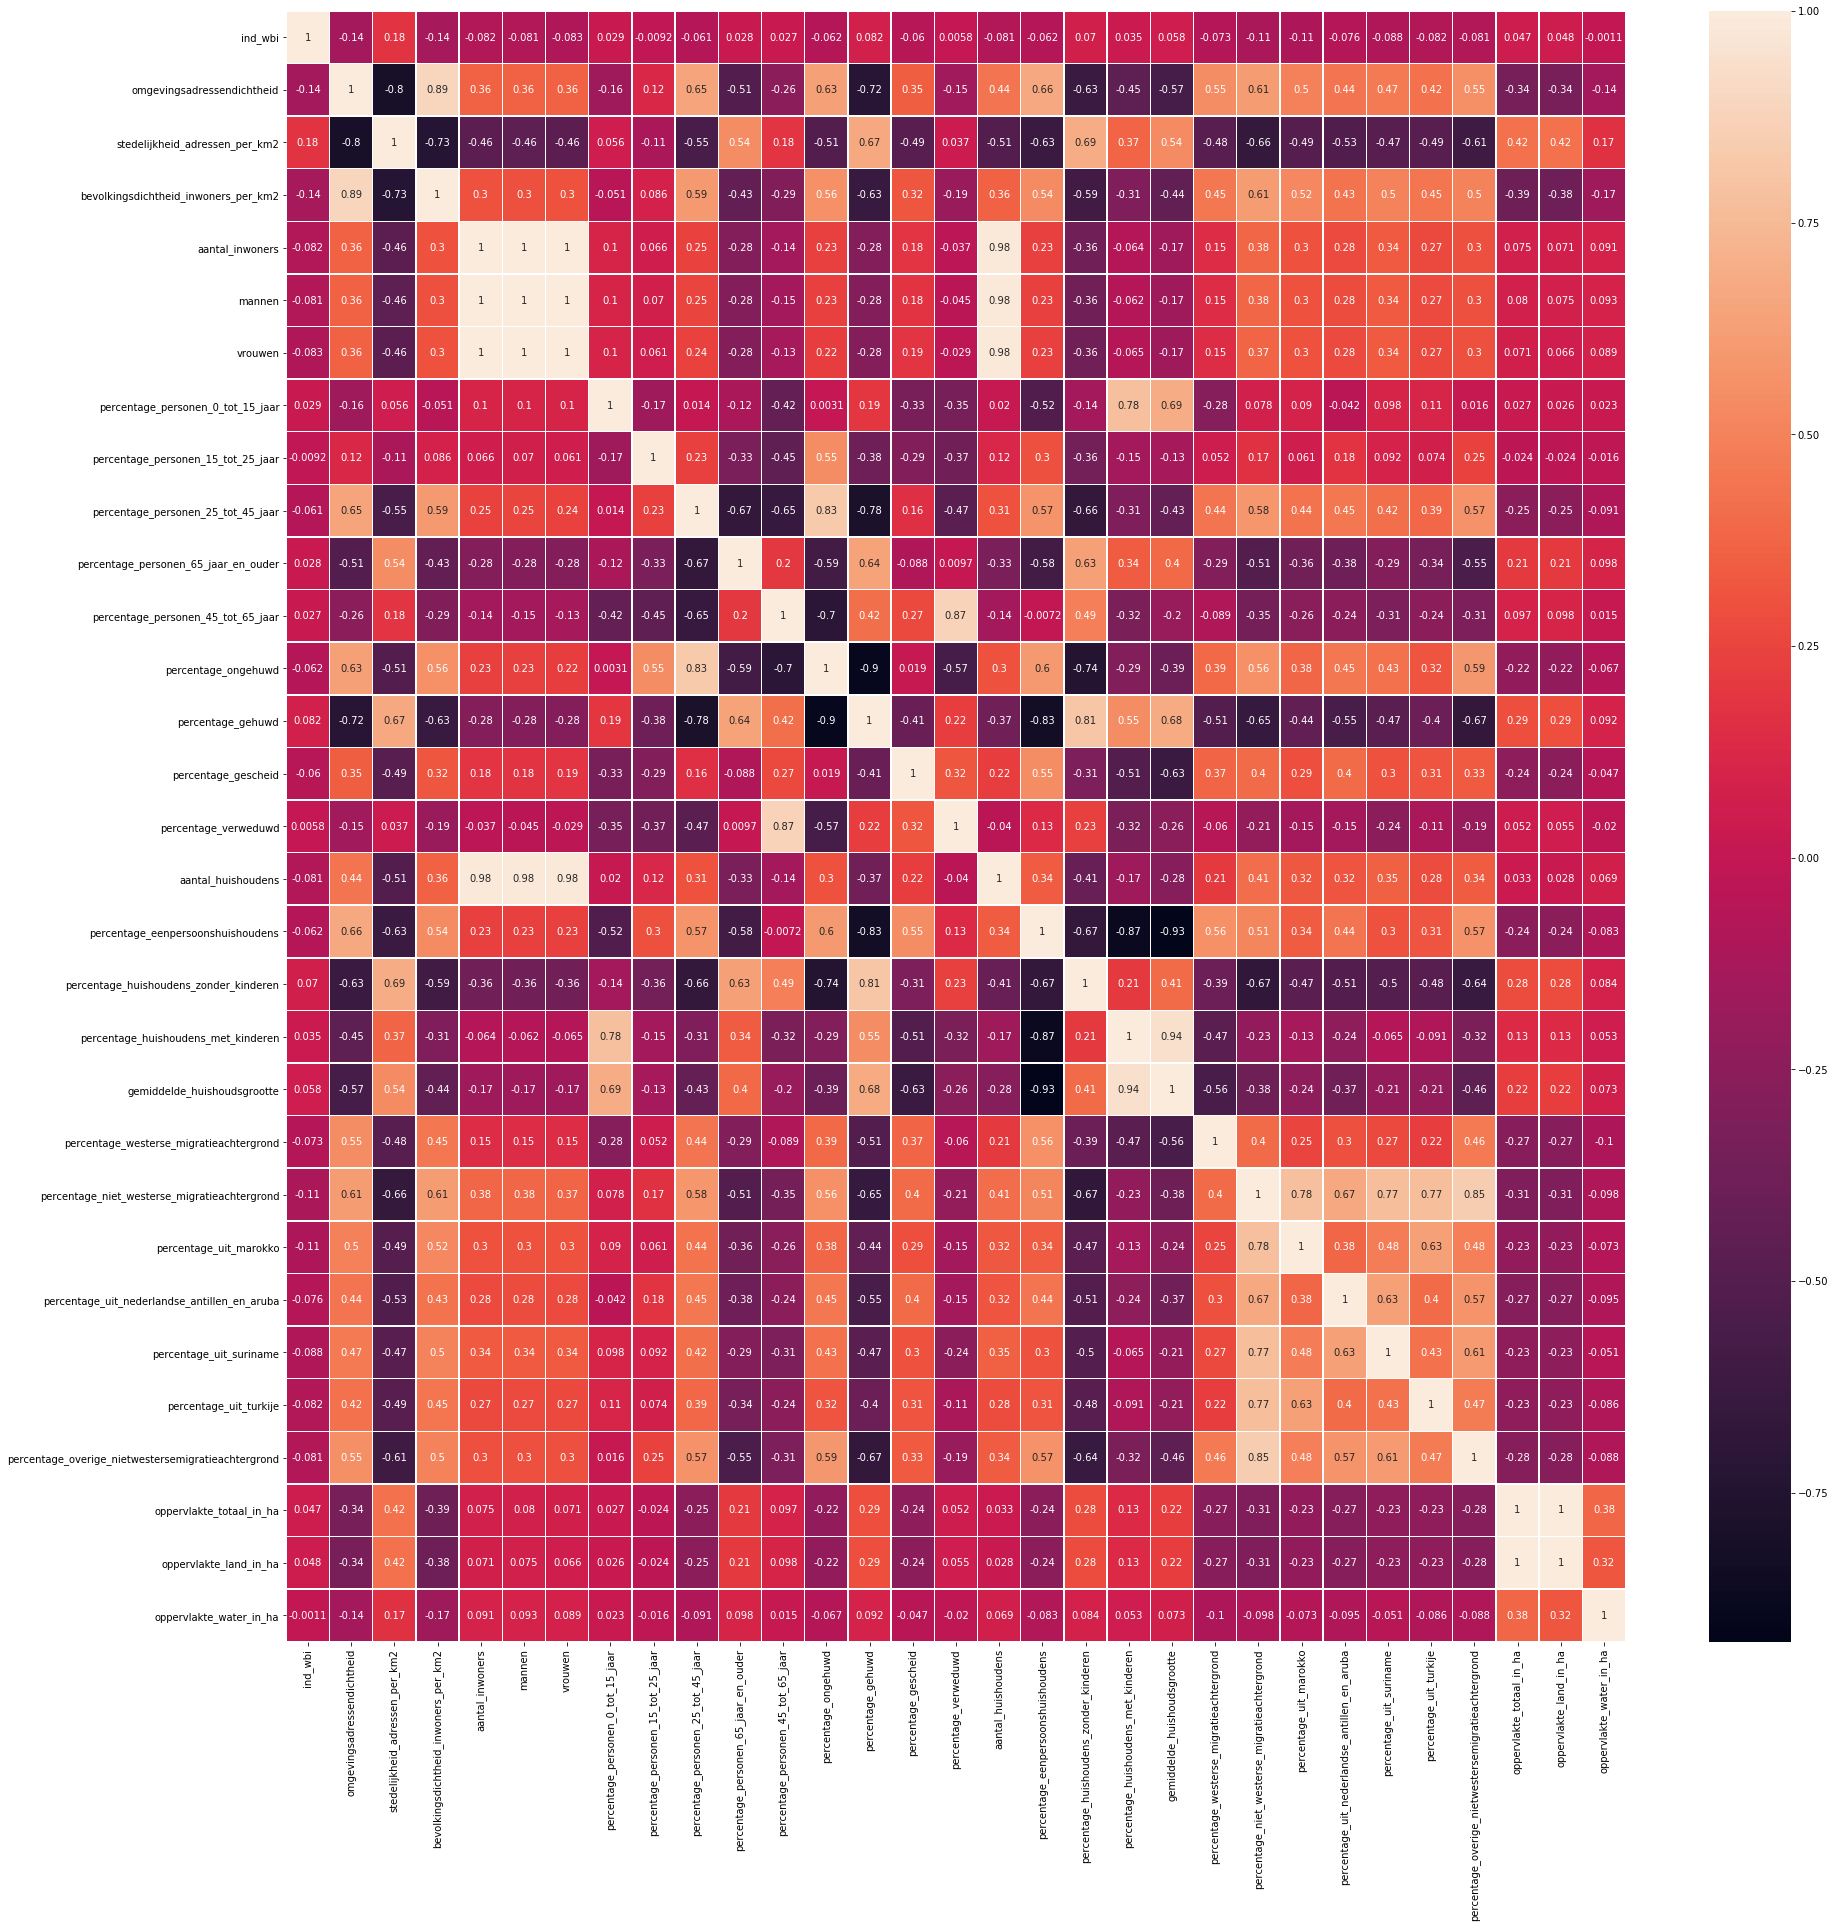

In [10]:
import seaborn as sns
correlatie = df_voorspelling_zonder_nan.corr()
fig, ax = plt.subplots(figsize=(30,30))         # Sample figsize in inches
sns.heatmap(correlatie, annot=True, linewidths=.5, ax=ax)



In [11]:
correlatie.drop(columns=['oppervlakte_water_in_ha', 'oppervlakte_land_in_ha', 'oppervlakte_totaal_in_ha', 'percentage_uit_turkije','percentage_uit_suriname', 'percentage_uit_nederlandse_antillen_en_aruba', 'percentage_uit_marokko', 'percentage_personen_15_tot_25_jaar', 'ind_wbi'], inplace=True)
correlatie.drop(index=['oppervlakte_water_in_ha', 'oppervlakte_land_in_ha', 'oppervlakte_totaal_in_ha', 'percentage_uit_turkije','percentage_uit_suriname', 'percentage_uit_nederlandse_antillen_en_aruba', 'percentage_uit_marokko', 'percentage_personen_15_tot_25_jaar', 'ind_wbi'], inplace=True)


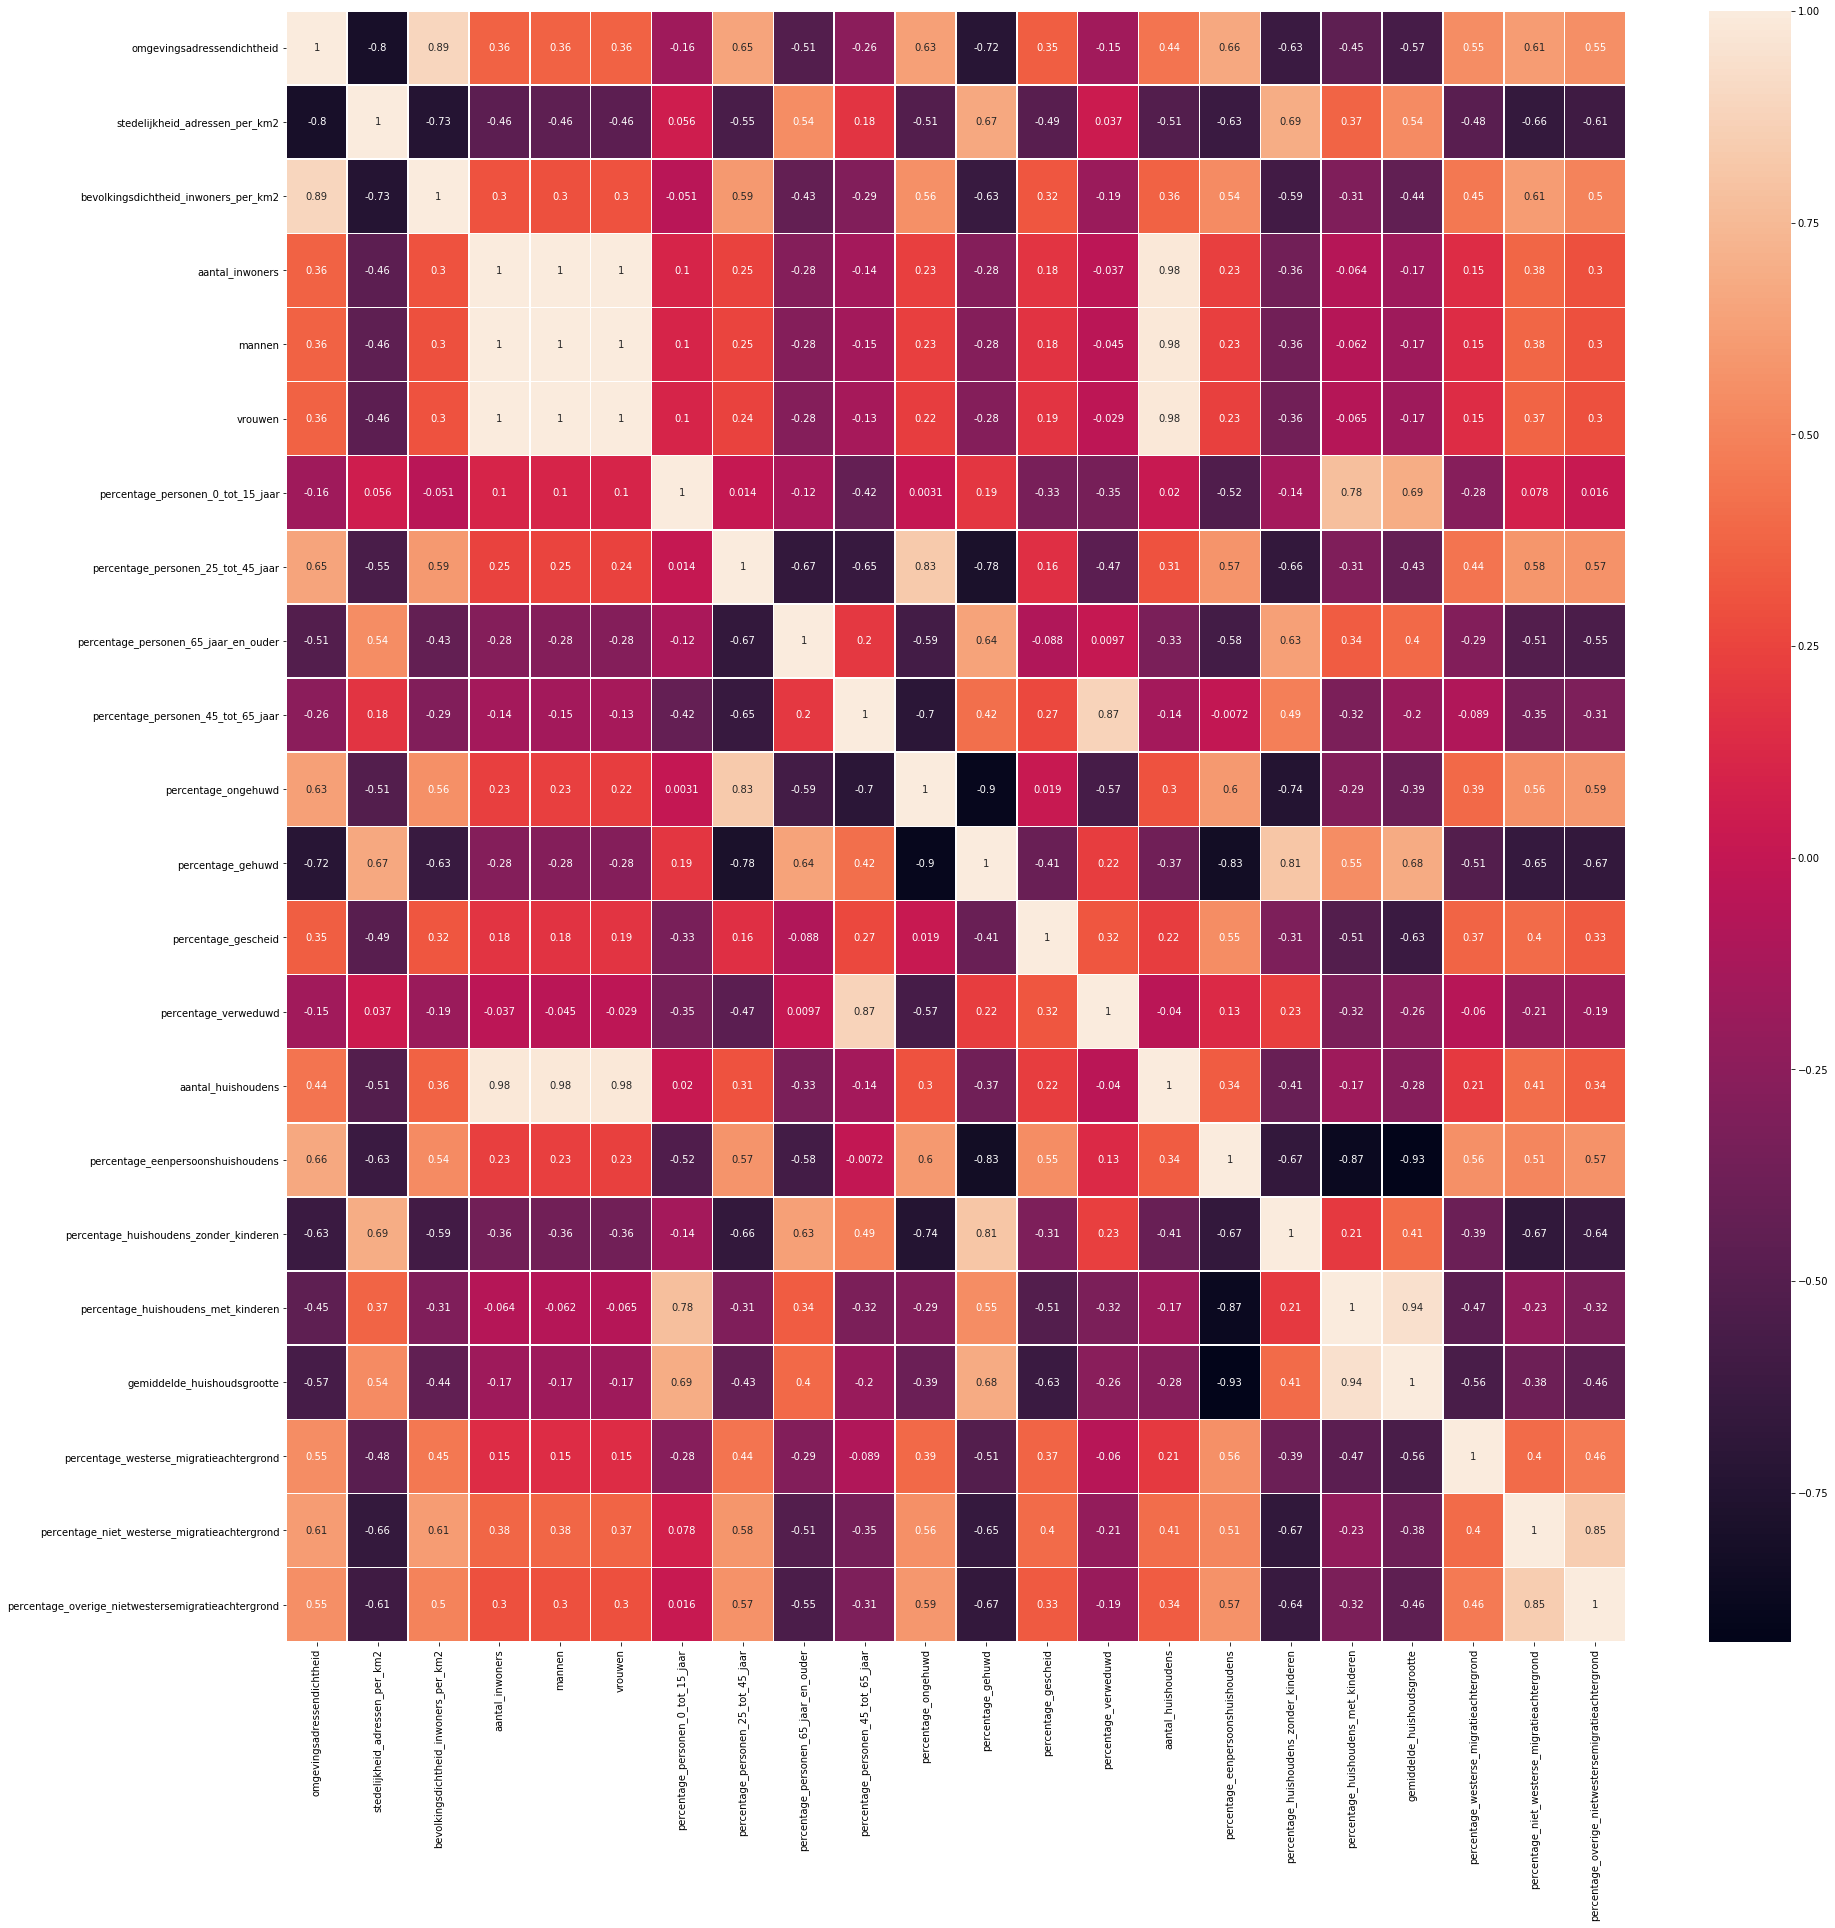

In [13]:
fig, ax = plt.subplots(figsize=(30,30))         # Sample figsize in inches
sns.heatmap(correlatie, annot=True, linewidths=.5, ax=ax)

## mogelijke modellen aan de hand van correlatie

### omgevingsadressendichtheid
- percentage_eenpersoonhuishoudens: 0.65
- percentage_gehuwd: -0.72
- percentage_25_tot_45_jaar: 0.65
- bevolkingsdichtheid_inwoners_per_km2: 0.9
- stedelijkheid_adressen_per_km2: -0.82

### stedelijkheid_adressen_per_km2
- percentage_niet_westerse_migratieachtergrond: -0.68
- percentage_gehuwd: 0.67
- bevolkingsdichtheid_inwoners_per_km2: -0.74
- omgevingsadressendichtheid: -0.82

### bevolkingsdichtheid_inwoners_per_km2
- stedelijkheid_adressen_per_km2: -0.74
- omgevingsadressendichtheid: 0.9 

### aantal_inwoners
- aantal_huishoudens: 0.99
- vrouwen: 1
- mannen: 1

### mannen
- aantal_huishoudens: 0.98
- aantal_inwoners: 1
- vrouwen: 1

### vrouwen
- aantal_huishoudens: 1
- mannen: 1

### percentage_personen_0_tot_15_jaar
- percentage_huishouden_met_kinderen: 0.73

### percentage_personen_25_tot_45_jaar
- percentage_gehuwd: -0.77
- percentage_ongehuwd: 0.81

### percentage_personen_45_tot_65_jaar:
- percentage_verweduwd: 0.83
- percentage_ongehuwd: -0.69

### percentage_personen_65_jaar_en_ouder
- percentage_personen_25_tot_45_jaar: -0.67
- percentage_gehuwd: 0.62

### percentage_ongehuwd
- percentage_huishoudens_zonder_kinderen: -0.72
- percentage_gehuwd: -0.88
- percentage_personen_45_tot_65_jaar: -0.69
- percentage_personen_25_tot_45_jaar: 0.81
 
### percentage_gehuwd
- percentage_overige__nietwestersemigratieachtergrond: -0.67
- percentage_huishoudens_zonder_kinderen: 0.78
- percentage_eenpersoonhuishoudens: -0.81
- percentage_ongehuwd: -0.88
- percentage_personen_25_tot_45_jaar: -0.77
- omgevingsadressendichtheid: -0.72

### percentage_gescheid
- gemiddelde_huishoudgrootte: -0.67


### percentage_verweduwd
- percentage_personen_45_tot_65_jaar: 0.83


### aantal_huishoudens
- aantal_inwoners: 0.99
- mannen: 0.98
- vrouwen: 0.97
 
### percentage_eenpersoonhuishoudens
- gemiddelde_huishoudgrootte: -0.91
- percentage_huishoudens_met_kinderen: -0.84
- percentage_ongehuwd: -0.81

### percentage_huishoudens_zonder_kinderen
- percentage_gehuwd: 0.78
- percentage_ongehuwd: -0.72
- percentage_personen_25_tot_45_jaar: -0.63

###percentage_huishoudens_met_kinderen
- gemiddelde_huishoudgrootte: 0.93
- percentage_eenpersoonhuishoudens: -0.84

### gemiddelde_huishoudgrootte
- percentage_huishoudens_met_kinderen: 0.93
- percentage_eenpersoonhuishoudens: -0.91
- percentage_gescheid: -0.66

### percentage_niet_westerse_migratieachtergrond
- percentage_overige__nietwestersemigratieachtergrond: 0.85
- stedelijkheid_adressen_per_km2: -0.68

### percentage_overige__nietwestersemigratieachtergrond
- percentage_niet_westerse_migratieachtergrond: 0.85
- percentage_gehuwd: -0.67






In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def CompleteRegressie(x, y, naam):
    y_train, y_test, x_train, x_test = train_test_split(y, x, test_size=0.3, random_state = 42)
    model = LinearRegression().fit(y_train, x_train)
    print('gegevens voor regressie: ', naam,':\n')
    print('intercept:',model.intercept_, 'coef:', model.coef_)
    print('R2 score:',model.score(y_test, x_test))
    return model

y = df_voorspelling_zonder_nan[['percentage_eenpersoonshuishoudens','percentage_gehuwd','percentage_personen_25_tot_45_jaar','bevolkingsdichtheid_inwoners_per_km2','stedelijkheid_adressen_per_km2']]
x = df_voorspelling_zonder_nan['omgevingsadressendichtheid']


CompleteRegressie(x, y, 'omgevingsadressendichtheid')


gegevens voor regressie:  omgevingsadressendichtheid :

intercept: 260.2371481067412 coef: [  19.43858071    0.44832971   21.18353232    0.27002202 -221.2474897 ]
R2 score: 0.8583238550172361


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#voorbeeld voor het uitvoeren van een predict
# test = LineaireRegressie(['percentage_eenpersoonshuishoudens', 'percentage_personen_25_tot_45_jaar','bevolkingsdichtheid_inwoners_per_km2','stedelijkheid_adressen_per_km2'])
# uitkomst = test.predict(np.array([[24, 23, 160, 5]]))
# uitkomst

### Uitslag van correlatie

Eerst wordt er duidelijk gemaakt welke variabele wordt voorspeld, hier worden de andere variabelen onder gezet, samen met de correlatie score. Daarna wordt daaronder de intercept, coef en score weergegeven van het lineaire regressie model waar die variabelen in verwerkt zijn. Voor elk model is er ook een aparte train test split gemaakt waarbij 30 procent van de data wordt gebruikt om het model te testen en 70 procent wordt gebruikt om het model te trainen. Met elk model is er trouwens ook geexperimenteerd of meer of minder variabele een verbetering in de kwaliteit opleveren. Wat wordt genoteerd is dus het best haalbare. 

Na het noteren van de scores wordt er een conclusie geschreven waarbij er wordt aangeraden om het model niet of wel te gebruiken, dit wordt aan de hand van de gegevens bij elk model geconcludeerd.

---------------------------------------------------
### omgevingsadressendichtheid
- percentage_eenpersoonshuishoudens: 0.65
- percentage_gehuwd: -0.72
- percentage_personen_25_tot_45_jaar: 0.65
- bevolkingsdichtheid_inwoners_per_km2: 0.9
- stedelijkheid_adressen_per_km2: -0.82

gegevens voor regressie:  omgevingsadressendichtheid

- intercept: 260.2371481067412 coef: [  19.43858071    0.44832971   21.18353232    0.27002202 -221.2474897 ]
- **R2 score**: 0.8583238550172361


- conclusie: Het is mogelijk om door middel van de percentage_eenpersoonhuishoudens, percentage_gehuwd, percentage_personen_25_tot_45_jaar, bevolkingsdichtheid_inwoners_per_km2 en stedelijkheid_adressen_per_km2 de omgevingsadressendichtheid te voorspellen. Hierboven staan de intercept, coef en R2 score weergegeven. De R2 score is in dit geval 0.85. Dit geeft aan dat het een betrouwbaar model is om te voorspellen. Hoe dichter bij de 1 of -1 des te betrouwbaarder het model is. Ik kan daarom het model aanraden om de omgevingsadressendichtheid te voorspellen. 

---------------------------------------------------
### stedelijkheid_adressen_per_km2
- percentage_niet_westerse_migratieachtergrond: -0.68
- percentage_gehuwd: 0.67
- bevolkingsdichtheid_inwoners_per_km2: -0.74
- omgevingsadressendichtheid: -0.82

gegevens voor regressie:  stedelijkheid_adressen_per_km2

intercept: 3.8078821449813867 coef: [-3.50027594e-02  1.76694629e-02 -2.49927772e-06 -5.59732972e-04]
- **R2 score**: 0.6826249829774111

- conclusie: De stedelijkheid_adressen_per_km2 voorspellen aan de hand percentage_niet_westerse_migratieachtergrond, percentage_gehuwd, bevolkingsdichtheid_inwoners_per_km2, en omgevingsadressendichtheid is niet betrouwbaar model. Dit wordt aangegeven door middel van de R2 score. Bij dit model krijgt het een score van 0.68 wat niet optimaal is aangezien het een middelmatige score heeft. Er kan een schatting worden gemaakt op basis van model maar op het gebied van betrouwbaarheid is dit geen goed model en raden wij het niet aan om dit model te hanteren. 

---------------------------------------------------
### bevolkingsdichtheid_inwoners_per_km2
- stedelijkheid_adressen_per_km2: -0.74
- omgevingsadressendichtheid: 0.9 

gegevens voor regressie:  bevolkingsdichtheid_inwoners_per_km2

intercept: 138.05958448805904 coef: [  1.96529786 -83.81951381]
- **R2 score**: 0.7816589370267111

- conclusie: Door middel van de R2 score kan je zeggen dat het een redelijk betrouwbaar model is. De score is 0.78, dit is niet genoeg om er een hele betrouwbare regressie uit op te maken maar het kan wel worden gebruikt om een schatting te maken zonder er te veel waarde aan te hechten. Wij raden dan ook aan om dit model alleen te gebruiken voor schattingen en niet voor hele preciese voorspellingen te maken aan de hand van deze variabelen. 


---------------------------------------------------
### aantal_inwoners
- aantal_huishoudens: 0.99
- vrouwen: 1
- mannen: 1

gegevens voor regressie:  aantal_inwoners

intercept: 0.6136495650334837 coef: [9.99959818e-01 9.99796963e-01 3.22629264e-04]
- **R2 score**: 0.9999998009825372

- conclusie: Dit is een uitermate goed model als het gaat om het voorspellen van het aantal_inwoners, dit is echter hartstikke logisch aangezien de mannen en vrouwen bij elkaar opgeteld al de aantal inwoners aangeeft. Het is daarom niet nodig om dit als lineaire regressie te gebruiken omdat er een simpelere methode is door het gewoon bij elkaar op te tellen. Wij raden het dan ook af om dit model voor deze doeleinde te gebruiken

---------------------------------------------------
### mannen
- aantal_huishoudens: 0.98
- aantal_inwoners: 1
- vrouwen: 1

gegevens voor regressie:  mannen

intercept: -0.6055301128626525 coef: [-9.99872156e-01  1.00005324e+00 -3.18114308e-04]
- **R2 score**: 0.9999991867624263

- conclusie: Dit is een uitermate goed model als het gaat om het voorspellen van het aantal mannen, dit is echter hartstikke logisch aangezien je kan opmaken hoeveel mannen er zijn als je het aantal vrouwen en het totale aantal inwoners hebt. Je kan het verschil berekenen door middel van het totale aantal inwoners min het aantal vrouwen te doen. Wij raden het dan ook af om dit model voor deze doeleinde te gebruiken omdat er een makkelijkere manier is. 

---------------------------------------------------
### vrouwen
- aantal_huishoudens: 1
- mannen: 1

gegevens voor regressie:  vrouwen

intercept: -33.77318498961358 coef: [0.94422732 0.0879414 ]
- **R2 score**: 0.9964098619177859

- conclusie: Op basis van de R2 score kan je zien dat ook dit een goed model is, echter kan je ook op een andere manier het aantal vrouwen achterhalen waardoor dit model overbodig is. Wanneer je het aantal inwoners en het aantal mannen heb je het aantal inwoners - het aantal mannen doen en dan heb je het aantal vrouwen. Dus hoewel dit kwaliteits technisch een goed model is, is het een overgecompliceerd model voor dit doeleinde. 

---------------------------------------------------

### percentage_personen_0_tot_15_jaar
- percentage_huishouden_met_kinderen: 0.73

gegevens voor regressie:  percentage_personen_0_tot_15_jaar

intercept: 3.961342004247694 coef: [0.33071271]
- **R2 score**: 0.6243728456241577


- conclusie: Bij dit lineaire regressie model komt er een score van 0.62 uit. Dit is een slechte score en hierdoor kan er geen goede voorspelling worden gemaakt. Er is geprobeerd mom deze socre te verbeteren om ook andere correlaties mee te nemen maar dit heeft niet een verbetering in het model gebracht. Wij raden het dan ook af om het aantal percentage personen 0 tot 15 jaar te bereken door het percentage huishouden met kinderen. 

---------------------------------------------------
### percentage_personen_25_tot_45_jaar
- percentage_gehuwd: -0.77
- percentage_ongehuwd: 0.81

gegevens voor regressie:  percentage_personen_25_tot_45_jaar

intercept: 9.388001508294264 coef: [-0.19558763  0.46521579]
- **R2 score**: 0.6834267032038376

- conclusie: Er zijn bij het bepalen van de percentage personen 25 tot 45 jaar twee variabelen die een redelijk sterke correlatie hebben hiermee. Deze correlaties gecombineerd geven echter niet een kwalitatief goed model. Dit kan ook weer worden afgelezen van de R2 score. Het wordt daarom ook afgeraden om dit model te gebruiken op basis van de slechte betrouwbaarheid van dit model. 

---------------------------------------------------

### percentage_personen_45_tot_65_jaar:
- percentage_verweduwd: 0.83
- percentage_ongehuwd: -0.69

gegevens voor regressie:  percentage_personen_45_tot_65_jaar

intercept: 21.138735918534145 coef: [ 2.02616515 -0.24078186]
- **R2 score**: 0.8279559458102244

- conclusie: Door middel van de percentage verweduwd en percentage ongehuwd kan er een voorspelling worden gemaakt voor de percentage personen 45 tot 65 jaar. Dit model heeft een score van 0.82 gekregen wat neerkomt dat dit een redelijk betrouwbaar model is om deze voorspelling met deze variabelen uit te voeren. De conclusie is dan ook dat dit model zeker binnen het project kan worden gebruikt. 

---------------------------------------------------
### percentage_personen_65_jaar_en_ouder
- percentage_personen_25_tot_45_jaar: -0.67
- percentage_gehuwd: 0.62

gegevens voor regressie:  percentage_personen_65_jaar_en_ouder

intercept: 30.14468989191871 coef: [-0.33488735  0.16963027]
- **R2 score**: 0.43172147378727005

- conclusie: Door middel van de score van 0.43 kan je zien dat dit geen betrouwbaar model is en wordt en daardoor wordt er ook een conclusie gemaakt dat dit model niet moet worden gebruikt bij het maken van een voorspelling voor percentage personen 65 jaar en ouder. 
---------------------------------------------------

### percentage_ongehuwd
- percentage_huishoudens_zonder_kinderen: -0.72
- percentage_gehuwd: -0.88
- percentage_personen_45_tot_65_jaar: -0.69
- percentage_personen_25_tot_45_jaar: 0.81

gegevens voor regressie:  percentage_ongehuwd

intercept: 90.80986636483274 coef: [ 0.20878712 -0.9165612  -0.58187154 -0.06466599]
- **R2 score**: 0.9329961675370066

- conclusie: Bij dit model wordt er aangeraden om het wel te gaan gebruiken. Er wordt bij dit model een score van 0.93 gegeven wat een extreem hoge score is wat dan ook aangeeft dat er een precieze voorspelling kan worden gedaan voor de percentage ongehuwd. Binnen het project moet er nog worden gekeken hoe dit eventueel kan worden verwerkt maar er wordt hoe dan ook aangeraden om dit model te hanteren vanwege de hoge betrouwbaarheid. 
---------------------------------------------------

### percentage_gehuwd
- percentage_overige__nietwestersemigratieachtergrond: -0.67
- percentage_huishoudens_zonder_kinderen: 0.78
- percentage_eenpersoonhuishoudens: -0.81
- percentage_ongehuwd: -0.88
- percentage_personen_25_tot_45_jaar: -0.77
- omgevingsadressendichtheid: -0.72

gegevens voor regressie:  percentage_gehuwd

intercept: 69.83644952294522 coef: [-6.79789463e-02  1.32739555e-01 -2.61773544e-01 -4.93667650e-01
 -2.28125162e-02 -2.01162500e-04]
- **R2 score**: 0.9274822961892147

- conclusie: Ook bij dit model wordt er een extreem hoge score gegeven aan het model. Door middel van 6 variabelen kan de variabele percentage_gehuwd goed worden voorspeld. De score van 0.92 geeft aan dat het een extreem hoge betrouwbaarheid hanteert. Er kan dus een precieze voorspelling worden gemaakt aan de hand van dit model. 
---------------------------------------------------

### percentage_verweduwd
- percentage_personen_45_tot_65_jaar: 0.83

gegevens voor regressie:  percentage_verweduwd

intercept: -0.9210248342503968 coef: [0.29548943]
- **R2 score**: 0.7678654987311013

- conclusie: Dit model heeft een score van 0.76 gekregen wat erop neerkomt dat het een redelijk betrouwbaar model is, het is echter niet betrouwbaar genoeg om dit te hanteren voor hele belangrijke voorspellingen. Het is een logische correlatie omdat de wat oudere mensen over het algemeen ook vaker weduwe zijn, wij raden aan om dit model niet te hanteren omdat de score te laag is en niet genoeg toegevoegde waarde brengt omdat het ook al een logische conclusie is zonder het model. 

---------------------------------------------------
### aantal_huishoudens
- aantal_inwoners: 0.99
- mannen: 0.98
- vrouwen: 0.97

gegevens voor regressie:  aantal_huishoudens

intercept: -71.656656691428 coef: [ 17.02240489 -16.77988784 -16.32950553]
- **R2 score**: 0.9677171598942964

- conclusie: Bij dit model kan er worden bepaald wat de aantal huishoudens zijn aan de hand van de aantal inwoners, mannen en vrouwen. Dit is echter logisch want zodra het aantal inwoners, mannen en vrouwen stijgen dan stijgt het aantal huishoudens ook. Dit model kan dus heel goed worden gebruikt om het aantal huishoudens te voorspellen. Wij raden dan ook aan om dit model te gebruiken ook al is er een logische correlatie. Er kan namelijk wel een voorspelling worden gedaan in het aantal huishoudens en een huishouden kan bijv. uit 1 t/m 5 personen bestaan. Verder heeft dit model ook een hele hoge score, dit is namelijk 0.96 wat echt extreem hoog is. 

---------------------------------------------------

### percentage_eenpersoonhuishoudens
- gemiddelde_huishoudgrootte: -0.91
- percentage_huishoudens_met_kinderen: -0.84
- percentage_ongehuwd: -0.81

gegevens voor regressie:  percentage_eenpersoonhuishoudens

intercept: 80.67370084696496 coef: [-26.85740371  -0.16845501   0.41265362]
- **R2 score**: 0.9171998532873816

- conclusie: Ook dit model heeft een hele hoge score en dus kwaliteit als het gaat over het voorspellen van de percentage eenpersoonshuishoudens. Er kan door middel van de hoge correlatie van de variabelen ten opzichte van percentage eenpersoonshuishoudens een goede voorspelling worden gemaakt. 

---------------------------------------------------

### percentage_huishoudens_zonder_kinderen
- percentage_gehuwd: 0.78
- percentage_ongehuwd: -0.72
- percentage_personen_25_tot_45_jaar: -0.63

gegevens voor regressie:  percentage_huishoudens_zonder_kinderen

intercept: 9.442284686435556 coef: [ 0.58364569 -0.02236976 -0.03172929]
- **R2 score**: 0.6214839609812486

- conclusie: Er is bij dit model geprobeerd om een schatting te maken naar de hoeveelheid huishoudens zonder kinderen. Door middel van gehuwd, ongehuwd en personen 25 tot 45 jaar werd er geprobeerd om hier een betrouwbaar model op te maken. Hoewel er wel een correlatie is tussen deze variabelen en percentage huishoudens zonder kinderen kan er geen betrouwbare voorspelling worden gedaan aan de hand van een lineaire regressie. De score van 0.62 wijst dit ook uit. Hieruit moet dan worden geconcludeerd worden dat het geen goed model is voor dit doeleinde en wordt er ook geadviseerd dat dit model niet moet worden gebruikt. 

---------------------------------------------------

###percentage_huishoudens_met_kinderen
- gemiddelde_huishoudgrootte: 0.93
- percentage_eenpersoonhuishoudens: -0.84

gegevens voor regressie:  percentage_huishoudens_met_kinderen

intercept: -33.70906132522849 coef: [29.60421173  0.05312692]
- **R2 score**: 0.8841734792036872

- conclusie: Bij dit model is geprobeerd om het percentage huishoudens met kinderen te voorspellen aan de hand van de gemiddelde huishoudgrootte en percentage eenpersoonshuishoudens. Uit de R2 score kan worden opgemaakt dat dit goed gelukt is omdat een score van 0.88 een hoge score is waar een goede betrouwbaarheid kan worden opgemaakt en wordt er dus geadviseerd om dit model zeker te hanteren. 

---------------------------------------------------

### gemiddelde_huishoudgrootte
- percentage_huishoudens_met_kinderen: 0.93
- percentage_eenpersoonhuishoudens: -0.91
- percentage_gescheid: -0.66

gegevens voor regressie:  gemiddelde_huishoudgrootte

intercept: 2.0596751466718786 coef: [ 0.01870373 -0.00965498 -0.01851979]
- **R2 score**: 0.9511765488672508

- conclusie: Het model wordt gebruikt om de gemiddelde_huishoudgrootte te voorspellen aan de hand van percentage huishoudens met kinderen, percentage eenpersoonhuishoudens en percentage gescheid. De score die dit model krijg is uitermate hoog. Er wordt dan ook zeker aangeraden om dit model te hanteren als er een voorspelling moet worden gedaan voor gemiddelde_huishoudgrootte. 

---------------------------------------------------

### percentage_niet_westerse_migratieachtergrond
- percentage_overige__nietwestersemigratieachtergrond: 0.85
- stedelijkheid_adressen_per_km2: -0.68

gegevens voor regressie:  percentage_niet_westerse_migratieachtergrond

intercept: 6.913457872097533 coef: [ 1.72297876 -1.54681551]
- **R2 score**: 0.7361253643358885

- conclusie: Bij dit model is er geprobeerd om het percentage niet westerse migratieachtergrond te voorspellen aan de hand van de variabelen percentage overige niet westerse migratieachtergrond en de stedelijkheid per adressen per km2. Uit de score kan worden opgemaakt dat dit een redelijk betrouwbaar model is. Het kan worden gebruikt om schattingen te geven maar het is niet helemaal accuraat. Er wordt dan ook niet het advies gegeven om hier geen voorspellingen mee te maken maar het kan wel leiden tot nieuwe inzichten binnen de data en hoe de variabelen effect op elkaar hebben. 

---------------------------------------------------

### percentage_overige__nietwestersemigratieachtergrond
- percentage_niet_westerse_migratieachtergrond: 0.85
- percentage_gehuwd: -0.67

gegevens voor regressie:  percentage_overige__nietwestersemigratieachtergrond

intercept: 5.81799170868223 coef: [ 0.30031141 -0.10211667]
- **R2 score**: 0.7265934895499666

- conclusie: Door middel van dit model is er geprobeerd om een schatting te maken voor percentage overige niet westerse migratieachtergrond, dit wordt gedaan door middel van percentage niet westerse migratieachtergrond en percentage gehuwd. Je kan zien dat er een correlatie is tussen deze twee variabelen ten opzichte van de percentage overige niet westerse migratieachtergrond. Gecombineerd zorgt dit echter voor een score van 0.72 voor het model. Dit geeft aan dat het een redelijk betrouwbaar model is en dat het kan worden gebruikt om schattingen te geven voor het percentage overige niet westerse migratieachtergrond. Het is echter niet helemaal accuraat, daar dient de score hoger voor te zijn. Er wordt dan ook het advies gegeven om hier geen voorspellingen mee te maken, wel schattingen en het kan ook leiden tot nieuwe inzichten binnen de data en hoe de variabelen effect op elkaar hebben. 


---------------------------------------------------
